In [1]:
from fastai.vision import *

In [2]:
path = Path('data/crobas')

In [36]:
path.ls()

[PosixPath('data/crobas/Oxyrhopus guibei'),
 PosixPath('data/crobas/models'),
 PosixPath('data/crobas/Jibóia - Boa constrictor amarali'),
 PosixPath('data/crobas/Erythrolamprus aesculapii'),
 PosixPath('data/crobas/Liophis miliaris'),
 PosixPath('data/crobas/Spilotes pullatus'),
 PosixPath('data/crobas/Chironius exoletus'),
 PosixPath('data/crobas/Jararaca pintada - Bothrops neuwiedi'),
 PosixPath('data/crobas/Philodryas olfersii'),
 PosixPath('data/crobas/Cobra coral – Micrurus frontalis'),
 PosixPath('data/crobas/Clelia clelia'),
 PosixPath('data/crobas/Philodryas patagoniensis'),
 PosixPath('data/crobas/Helicops modestus'),
 PosixPath('data/crobas/Cascavel -  Crotalus durissus collilineatus'),
 PosixPath('data/crobas/34473044255_ba5f79e7da_b.jpg'),
 PosixPath('data/crobas/.ipynb_checkpoints'),
 PosixPath('data/crobas/Caiçaca - Bothrops moojeni'),
 PosixPath('data/crobas/Salamanta epicrates cenchria'),
 PosixPath('data/crobas/Cascavel - Crotalus durissus terrificus'),
 PosixPath('dat

As labels do modelo

In [37]:
classes = ['Jibóia - Boa constrictor amarali',
           'Jararaca pintada - Bothrops neuwiedi',
           'boipeva','Philodryas olfersii',
           'caninana',
           'Cobra coral – Micrurus frontalis',
           'Clelia clelia',
           'Philodryas patagoniensis',
           'Cascavel -  Crotalus durissus collilineatus',
           'Caiçaca - Bothrops moojeni',
           'Oxyrhopus guibei',
           'Philodryas nattereri',
           'Cascavel - Crotalus durissus terrificus',
           'Chironius exoletus',
           'Salamanta epicrates cenchria',
           'Helicops modestus',
           'Philodryas olfersii',
           'Spilotes pullatus',
           'Liophis miliaris',
           'Waglerophis merremii',
           'Erythrolamprus aesculapii']

In [38]:
#download_images(path/file, dest, max_pics=20, max_workers=0)

In [39]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Jibóia - Boa constrictor amarali


Jararaca pintada - Bothrops neuwiedi


boipeva


/opt/anaconda3/lib/python3.7/site-packages/fastprogress/fastprogress.py:96: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


Philodryas olfersii


caninana


Cobra coral – Micrurus frontalis


Clelia clelia


Philodryas patagoniensis


Cascavel -  Crotalus durissus collilineatus


Caiçaca - Bothrops moojeni


Oxyrhopus guibei


Philodryas nattereri


Cascavel - Crotalus durissus terrificus


Chironius exoletus


Salamanta epicrates cenchria


Helicops modestus


Philodryas olfersii


Spilotes pullatus


Liophis miliaris


Waglerophis merremii


Erythrolamprus aesculapii


In [40]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [41]:
data.classes

['Caiçaca - Bothrops moojeni',
 'Cascavel -  Crotalus durissus collilineatus',
 'Cascavel - Crotalus durissus terrificus',
 'Chironius exoletus',
 'Clelia clelia',
 'Cobra coral – Micrurus frontalis',
 'Erythrolamprus aesculapii',
 'Helicops modestus',
 'Jararaca pintada - Bothrops neuwiedi',
 'Jibóia - Boa constrictor amarali',
 'Liophis miliaris',
 'Oxyrhopus guibei',
 'Philodryas nattereri',
 'Philodryas olfersii',
 'Philodryas patagoniensis',
 'Salamanta epicrates cenchria',
 'Spilotes pullatus',
 'Waglerophis merremii',
 'crobas']

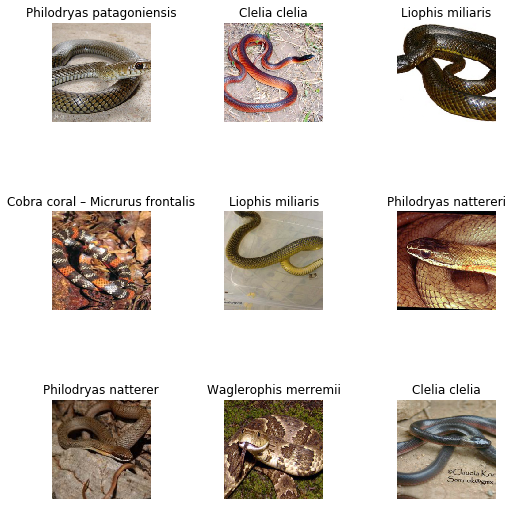

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [42]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Caiçaca - Bothrops moojeni',
  'Cascavel -  Crotalus durissus collilineatus',
  'Cascavel - Crotalus durissus terrificus',
  'Chironius exoletus',
  'Clelia clelia',
  'Cobra coral – Micrurus frontalis',
  'Erythrolamprus aesculapii',
  'Helicops modestus',
  'Jararaca pintada - Bothrops neuwiedi',
  'Jibóia - Boa constrictor amarali',
  'Liophis miliaris',
  'Oxyrhopus guibei',
  'Philodryas nattereri',
  'Philodryas olfersii',
  'Philodryas patagoniensis',
  'Salamanta epicrates cenchria',
  'Spilotes pullatus',
  'Waglerophis merremii',
  'crobas'],
 19,
 211,
 52)

In [67]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
#learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [68]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,3.427743,3.208882,0.942308,00:02
1,3.330209,2.765876,0.942308,00:02
2,3.004043,2.084695,0.615385,00:02
3,2.575521,1.509172,0.403846,00:02
4,2.191233,1.223656,0.423077,00:02
5,1.874988,1.089419,0.423077,00:02
6,1.633228,1.034453,0.423077,00:02
7,1.447280,1.006361,0.403846,00:02
8,1.296561,0.996943,0.403846,00:02
9,1.172807,1.004455,0.384615,00:02


In [36]:
learn.save('stage-1')

In [69]:
learn.unfreeze()

In [70]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


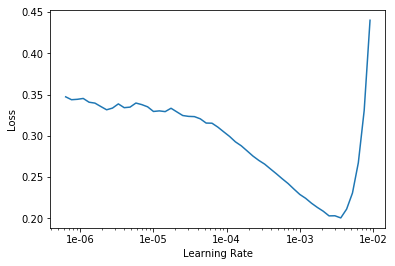

In [71]:
learn.recorder.plot()

In [73]:
learn.fit_one_cycle(7, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.093525,1.561779,0.442308,00:02
1,0.076783,1.364882,0.403846,00:02
2,0.068068,1.221259,0.365385,00:02
3,0.061869,1.127808,0.365385,00:02
4,0.057680,1.091371,0.326923,00:02
5,0.053140,1.068059,0.326923,00:02
6,0.049271,1.057616,0.307692,00:02


In [ ]:
learn.fit_one_cycle(10, 3e-4)

In [92]:
learn.save('stage-2')

In [85]:
learn.export()

In [31]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (143 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jibóia - Boa constrictor amarali,Jibóia - Boa constrictor amarali,Jibóia - Boa constrictor amarali,Jibóia - Boa constrictor amarali,Jibóia - Boa constrictor amarali
Path: data/crobas;

Valid: LabelList (35 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jararaca pintada - Bothrops neuwiedi,Philodryas olfersii,Caiçaca - Bothrops moojeni,boipeva,caninana
Path: data/crobas;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequentia

In [75]:
interp = ClassificationInterpretation.from_learner(learn)

In [82]:
array = interp.confusion_matrix()

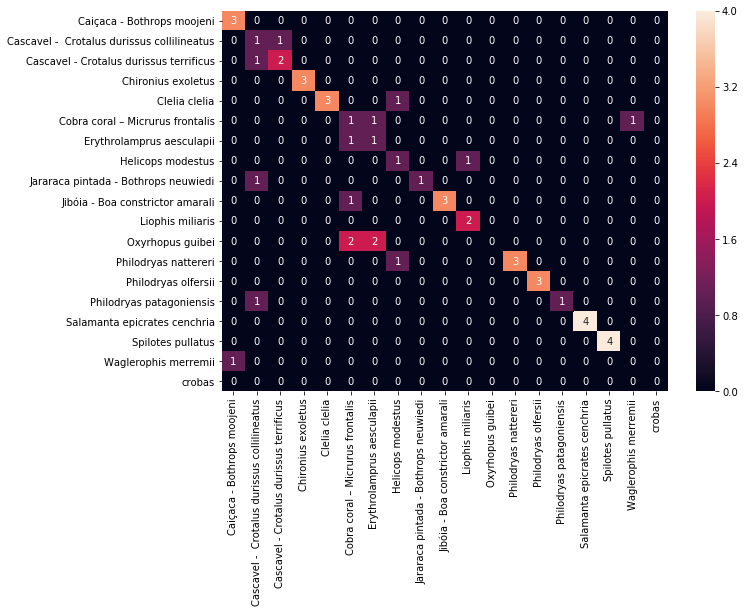

In [89]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

classes = ['Caiçaca - Bothrops moojeni',
  'Cascavel -  Crotalus durissus collilineatus',
  'Cascavel - Crotalus durissus terrificus',
  'Chironius exoletus',
  'Clelia clelia',
  'Cobra coral – Micrurus frontalis',
  'Erythrolamprus aesculapii',
  'Helicops modestus',
  'Jararaca pintada - Bothrops neuwiedi',
  'Jibóia - Boa constrictor amarali',
  'Liophis miliaris',
  'Oxyrhopus guibei',
  'Philodryas nattereri',
  'Philodryas olfersii',
  'Philodryas patagoniensis',
  'Salamanta epicrates cenchria',
  'Spilotes pullatus',
  'Waglerophis merremii',
  'crobas']

df_cm = pd.DataFrame(array, index = classes,
                  columns = classes)
plt.figure(figsize = (10,7))
sns_plot = sn.heatmap(df_cm, annot=True)
fig = sns_plot.get_figure()
fig.savefig("matriz.png")
sns_plot

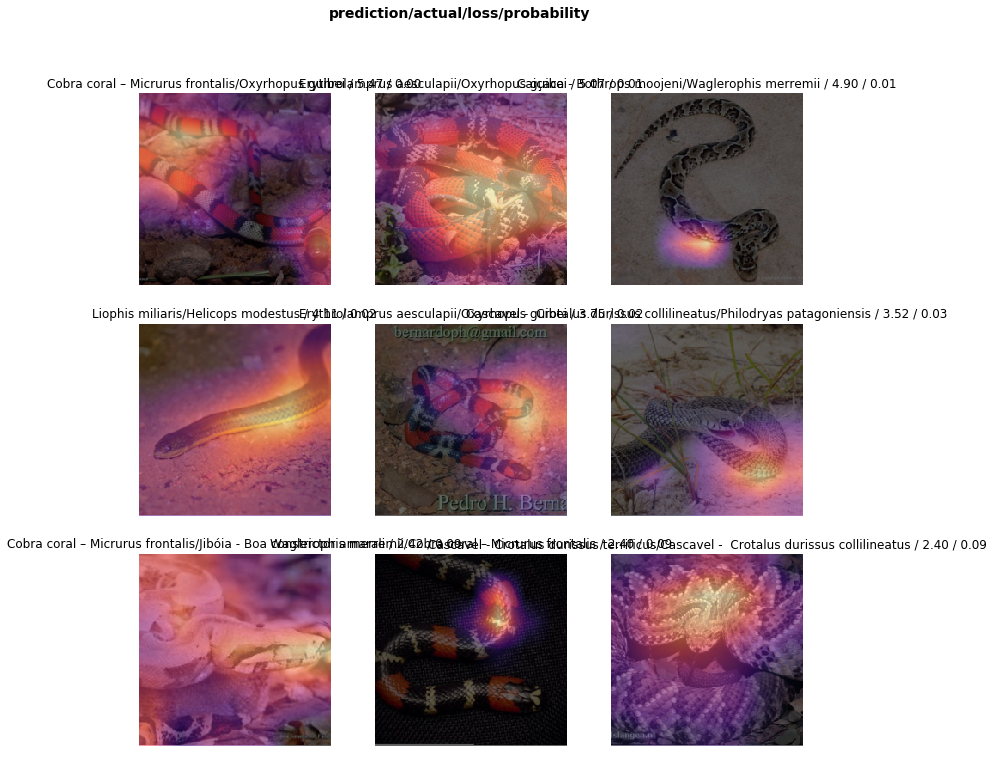

In [79]:
interp.plot_top_losses( k = 9)